# UA - Hackathon

## Ankush Goel

## Importing and reading input files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
service_inventory = pd.read_csv('./Datasets/Inflight Service_Inventory data.csv')
service_preOrder = pd.read_csv('./Datasets/Inflight Service_Pre order data.csv')
customer_comments = pd.read_csv('./Datasets/Survey data _Customer comments.csv')
satisfaction_score = pd.read_csv('./Datasets/Survey data_Inflight Satisfaction Score.csv')

In [3]:
service_inventory.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0


In [4]:
service_preOrder.head()

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,9/1/2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,IAX,SFX,ELXX8H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,IAX,CUX,NCXX4S,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2


In [5]:
customer_comments.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
3,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member
4,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member


In [6]:
satisfaction_score.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


## Data cleaning and pre-processing

In [7]:
def clean_data(data_frame, columns_to_drop=None):
    if columns_to_drop:
        data_frame.drop(columns=columns_to_drop, inplace=True)
    data_frame.drop_duplicates(inplace=True)
    numeric_columns = data_frame.select_dtypes(include=['number'])
    column_means = numeric_columns.mean()
    
    data_frame.fillna(column_means, inplace=True)
    
    data_frame = data_frame.dropna()
    
    return data_frame

In [8]:
service_inventory_cleaned = clean_data(service_inventory, ['departure_station_code','arrival_station_code','scheduled_departure_dtl','entree_product_id','entree_code'])

In [9]:
service_inventory_cleaned.head()

,flight_number,entree_description,planned_entree_count,consumed_entree_count
0,2634,Belgium waffle,20,32
1,2666,Vegetarian chili and polenta cake,3,0
2,2310,Scrambled eggs,9,7
3,1712,Mediterranean Falafel Bowl,1,0
4,1225,Vegetarian chili and polenta cake,1,0


In [10]:
service_preOrder_cleaned = clean_data(service_preOrder, ['departure_station_code','arrival_station_code','record_locator','carrier_code','scheduled_departure_dtl','cabin_code'])

In [11]:
service_preOrder_cleaned.head()

,flight_number,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2


In [12]:
customer_comments_cleaned = clean_data(customer_comments, ['origin_station_code','destination_station_code','scheduled_departure_date','fleet_type_description','fleet_usage','response_group','ques_verbatim_text'])

In [13]:
customer_comments_cleaned.head()

,flight_number,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,loyalty_program_level
0,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,non-elite
2,1876,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,non-elite
3,5469,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,premier gold
4,281,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,non-elite
7,2049,Early & Ontime,Delayed,Latin,"I enjoy illy coffee, but the decaf instant was...",90+,non-elite


### converting seat_factor_band

In [14]:
def convert_value_string(value_str):
    if 'to' in value_str:  # Handle range strings
        start, end = map(int, value_str.split('to'))
        mean = (start + end) / 2
        return mean
    elif re.match(r'\d+\+', value_str):  # Handle numeric values with '+'
        min_value = int(value_str.replace('+', ''))
        return min_value
    return value_str  

In [15]:
customer_comments_cleaned['seat_factor_band'] = customer_comments_cleaned['seat_factor_band'].apply(convert_value_string)

/tmp/ipykernel_12999/4174733018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_comments_cleaned['seat_factor_band'] = customer_comments_cleaned['seat_factor_band'].apply(convert_value_string)


In [16]:
customer_comments_cleaned.head()

,flight_number,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,loyalty_program_level
0,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite
2,1876,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90.0,non-elite
3,5469,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90.0,premier gold
4,281,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,35.0,non-elite
7,2049,Early & Ontime,Delayed,Latin,"I enjoy illy coffee, but the decaf instant was...",90.0,non-elite


In [17]:
satisfaction_score_cleaned = clean_data(satisfaction_score, ['origin_station_code','destination_station_code','record_locator','scheduled_departure_date','equipment_type_code','ua_uax','actual_flown_miles','departure_gate','arrival_gate','response_group','media_provider','question_text','driver_sub_group1','driver_sub_group2','arrival_delay_group','cabin_name','fleet_type_description','fleet_usage'])
satisfaction_score_cleaned['seat_factor_band'] = satisfaction_score_cleaned['seat_factor_band'].apply(convert_value_string)

/tmp/ipykernel_12999/950169720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_score_cleaned['seat_factor_band'] = satisfaction_score_cleaned['seat_factor_band'].apply(convert_value_string)


In [18]:
satisfaction_score_cleaned.head()

,flight_number,score,satisfaction_type,arrival_delay_minutes,cabin_code_desc,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,haul_type,international_domestic_indicator,hub_spoke
1,4645,5,Satisfied,10,Business,Domestic,2,90.0,premier platinum,Boomer,Short,Domestic,spoke departure
2,5236,5,Satisfied,-8,Business,Domestic,2,90.0,premier platinum,Gen X,Short,Domestic,spoke departure
3,4686,3,Dissatisfied,-11,Economy,Domestic,3,90.0,non-elite,Boomer,Short,Domestic,hub departure
4,671,5,Satisfied,18,Business,Domestic,2,90.0,premier silver,Boomer,Short,Domestic,hub departure
7,4797,3,Dissatisfied,-14,Business,Domestic,2,35.0,premier gold,Gen X,Short,Domestic,hub departure


## Joining tables 

In [19]:
Score1 = pd.merge(service_inventory_cleaned, satisfaction_score_cleaned, on = 'flight_number')
Score2 = pd.merge(service_preOrder_cleaned, satisfaction_score_cleaned, on = 'flight_number')
Score3 = pd.merge(customer_comments_cleaned, satisfaction_score_cleaned, on = 'flight_number')

In [20]:
Score1.head()

,flight_number,entree_description,planned_entree_count,consumed_entree_count,score,satisfaction_type,arrival_delay_minutes,cabin_code_desc,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,haul_type,international_domestic_indicator,hub_spoke
0,2634,Belgium waffle,20,32,5,Satisfied,-18,Economy,Domestic,1,80.0,non-elite,Gen X,Medium,Domestic,spoke departure
1,2634,Belgium waffle,20,32,5,Satisfied,-4,Business,Domestic,1,90.0,premier platinum,Gen X,Medium,Domestic,hub departure
2,2634,Belgium waffle,20,32,3,Dissatisfied,-11,Economy,Domestic,1,90.0,non-elite,Silent,Medium,Domestic,hub departure
3,2634,Belgium waffle,20,32,1,Dissatisfied,-10,Economy,Domestic,1,90.0,premier gold,Boomer,Medium,Domestic,hub departure
4,2634,Belgium waffle,20,32,5,Satisfied,-15,Economy,Domestic,2,80.0,premier platinum,Boomer,Medium,Domestic,hub departure


In [21]:
Score2.head()

,flight_number,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty,score,satisfaction_type,arrival_delay_minutes,cabin_code_desc,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,haul_type,international_domestic_indicator,hub_spoke
0,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,2,Dissatisfied,-24,Business,Domestic,1,90.0,non-elite,Boomer,Medium,Domestic,spoke departure
1,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,2,Dissatisfied,-19,Economy,Domestic,1,90.0,premier silver,Boomer,Medium,Domestic,spoke departure
2,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,1,Dissatisfied,23,Economy,Domestic,2,90.0,non-elite,Boomer,Medium,Domestic,spoke departure
3,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,1,Dissatisfied,-25,Economy,Domestic,1,90.0,non-elite,Boomer,Medium,Domestic,spoke departure
4,1423,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1,3,Dissatisfied,-25,Economy,Domestic,1,90.0,premier silver,Gen X,Medium,Domestic,spoke departure


In [22]:
Score3.head()

,flight_number,arrival_delay_group,departure_delay_group,entity_x,verbatim_text,seat_factor_band_x,loyalty_program_level_x,score,satisfaction_type,arrival_delay_minutes,cabin_code_desc,entity_y,number_of_legs,seat_factor_band_y,loyalty_program_level_y,generation,haul_type,international_domestic_indicator,hub_spoke
0,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite,4,Satisfied,0,Business,Atlantic,1,35.0,non-elite,Boomer,Long,International,spoke departure
1,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite,2,Dissatisfied,0,Business,Atlantic,1,35.0,premier silver,Boomer,Long,International,spoke departure
2,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite,1,Dissatisfied,-25,Economy,Atlantic,2,35.0,premier gold,Boomer,Long,International,spoke departure
3,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite,4,Satisfied,-25,United Premium Plus,Atlantic,1,35.0,premier gold,Gen X,Long,International,spoke departure
4,950,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,35.0,non-elite,5,Satisfied,-16,Economy,Atlantic,1,35.0,premier silver,Millennial,Long,International,spoke departure


In [23]:
Score1.describe()

,flight_number,planned_entree_count,consumed_entree_count,arrival_delay_minutes,number_of_legs,seat_factor_band
count,352268.000000,352268.000000,352268.000000,352268.000000,352268.000000,352268.000000
mean,1498.598746,8.924978,4.107373,-3.795758,1.314817,83.924356
std,799.115779,9.266367,5.550595,30.700306,0.489355,13.071295
min,23.000000,0.000000,-7.000000,-99.000000,1.000000,35.000000
25%,748.000000,4.000000,0.000000,-19.000000,1.000000,80.000000
50%,1599.000000,7.000000,2.000000,-10.000000,1.000000,90.000000
75%,2115.000000,11.000000,6.000000,2.000000,2.000000,90.000000
max,6375.000000,193.000000,100.000000,907.000000,3.000000,90.000000


In [24]:
Score2.describe()

,flight_number,pre_order_qty,arrival_delay_minutes,number_of_legs,seat_factor_band
count,240969.000000,240969.000000,240969.000000,240969.000000,240969.000000
mean,1328.830007,1.828044,-2.985998,1.308625,83.860621
std,765.834996,1.428594,33.876452,0.487421,13.172878
min,2.000000,1.000000,-99.000000,1.000000,35.000000
25%,598.000000,1.000000,-19.000000,1.000000,80.000000
50%,1413.000000,1.000000,-9.000000,1.000000,90.000000
75%,1981.000000,2.000000,2.000000,2.000000,90.000000
max,2685.000000,44.000000,853.000000,3.000000,90.000000


In [25]:
Score3.describe()

,flight_number,seat_factor_band_x,arrival_delay_minutes,number_of_legs,seat_factor_band_y
count,118358.000000,118358.000000,118358.000000,118358.000000,118358.000000
mean,1003.740372,83.080823,-0.637194,1.285025,83.203966
std,1000.699885,14.168133,41.393403,0.477195,14.054484
min,2.000000,35.000000,-104.000000,1.000000,35.000000
25%,202.000000,80.000000,-20.000000,1.000000,80.000000
50%,915.000000,90.000000,-8.000000,1.000000,90.000000
75%,1496.000000,90.000000,6.000000,2.000000,90.000000
max,6375.000000,90.000000,880.000000,3.000000,90.000000


In [26]:
Score1.to_csv('UA_Hackathon_data.csv')

# Data Visualization

In [27]:
def visualize_column_relations(data_frame, target_column, expceptional_col):
    sns.set(style="whitegrid")
    
    other_columns = [col for col in data_frame.columns if col != target_column and col != expceptional_col]
    for column in other_columns:
        plt.figure(figsize=(10, 6))
        
        if data_frame[column].dtype == 'object':
            sns.countplot(x=column, hue=target_column, data=data_frame)
            plt.xticks(rotation=45, fontsize=8)
        else:
            sns.scatterplot(x=column, y=target_column, data=data_frame)
        
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.title(f'Relation between {column} and {target_column}')
        plt.tight_layout()
        plt.show()

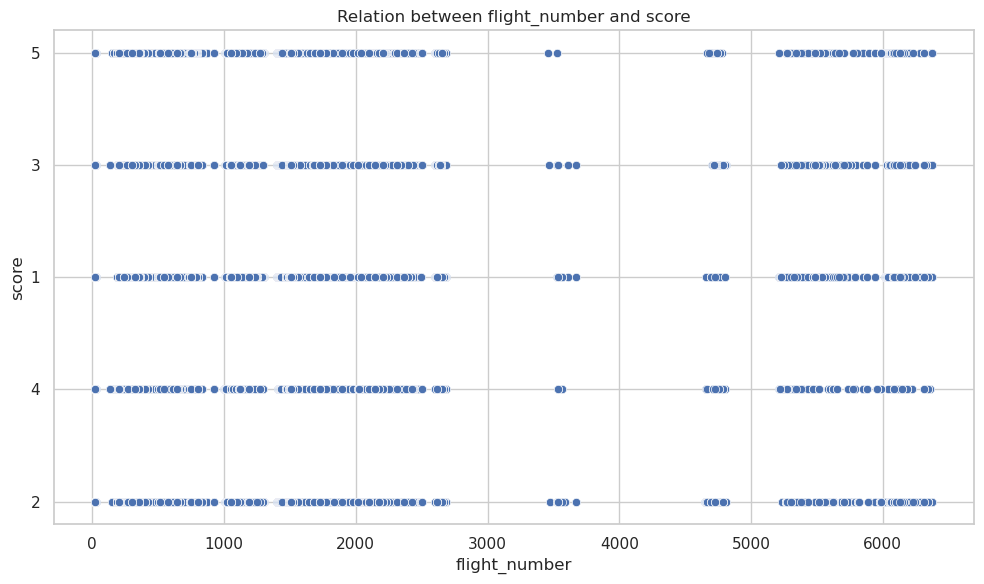

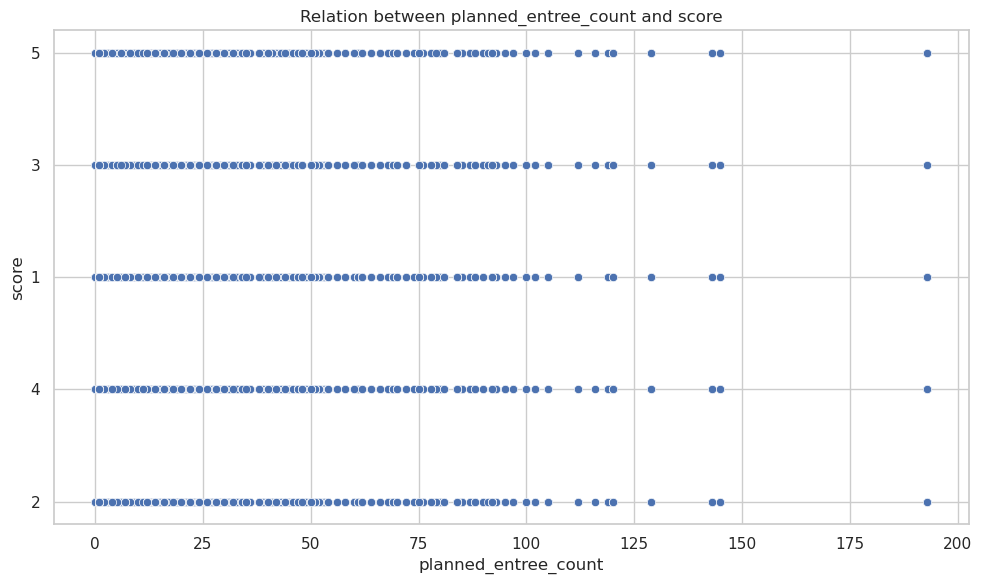

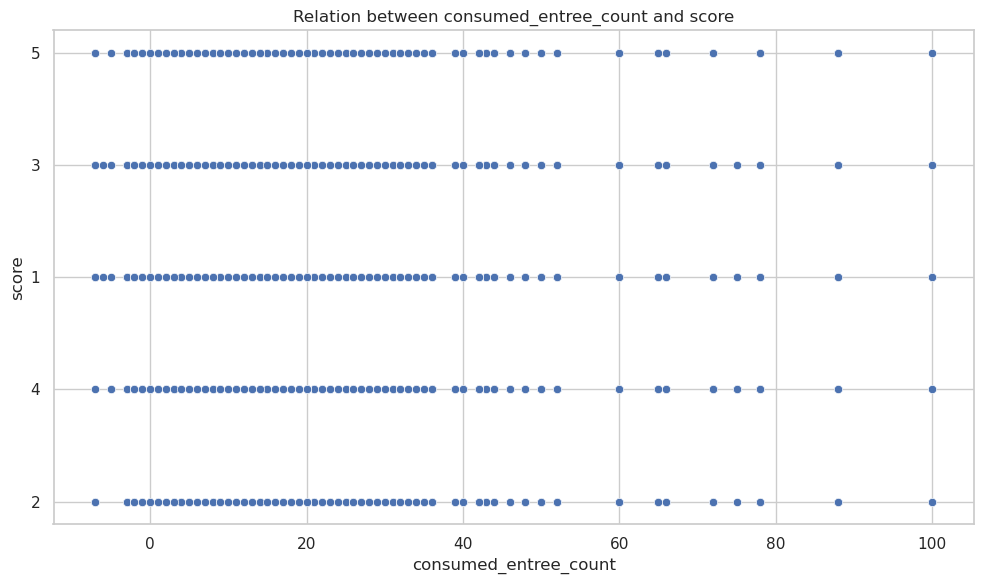

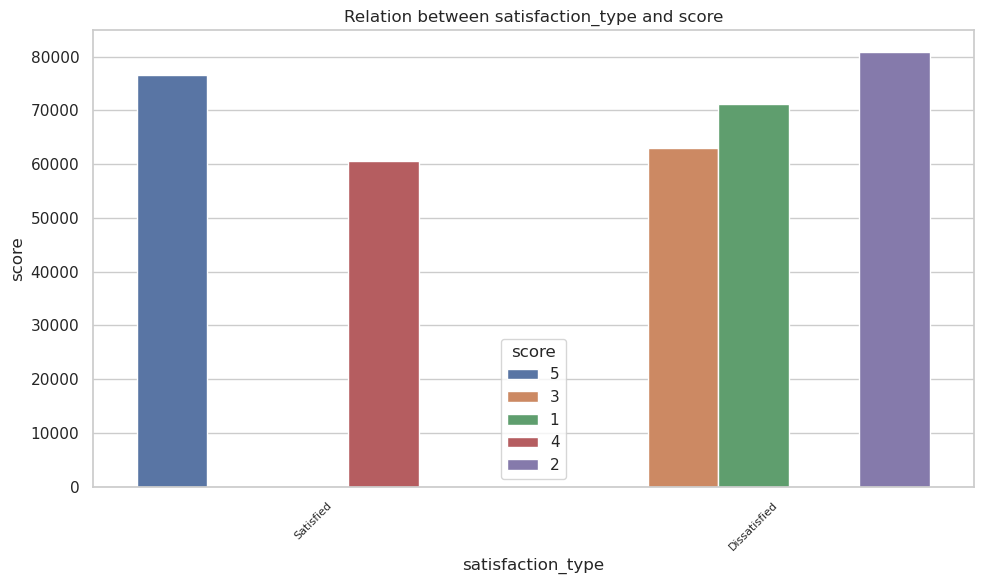

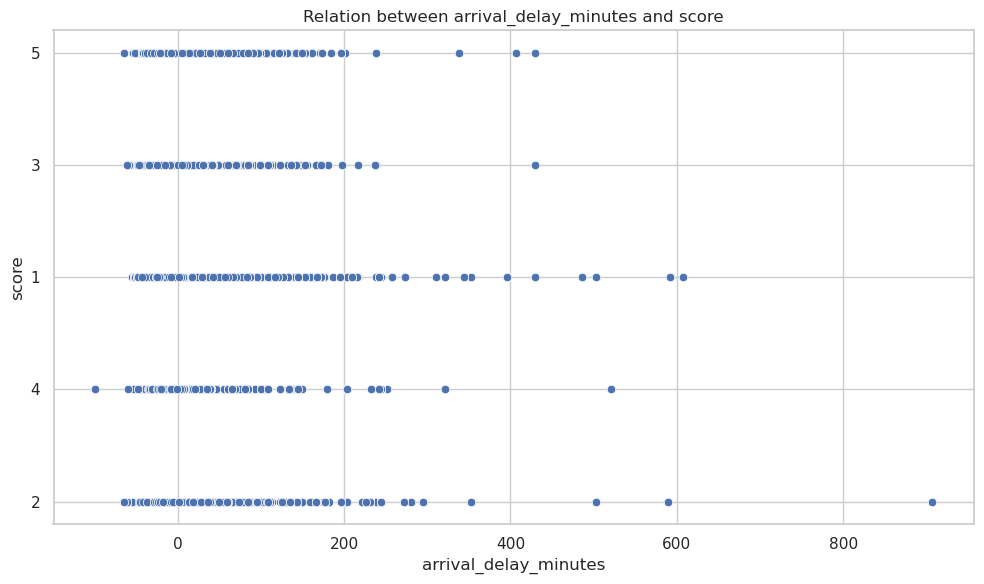

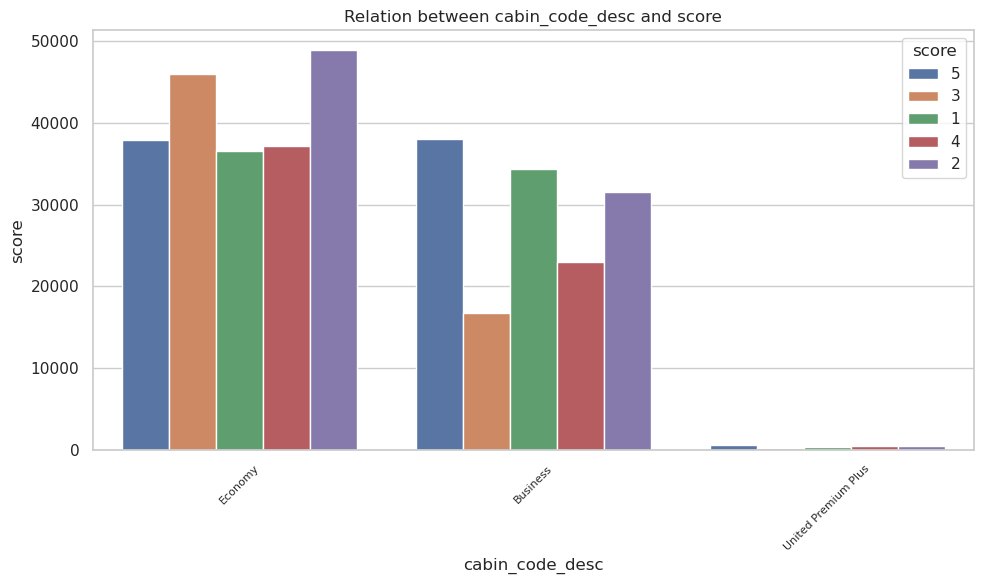

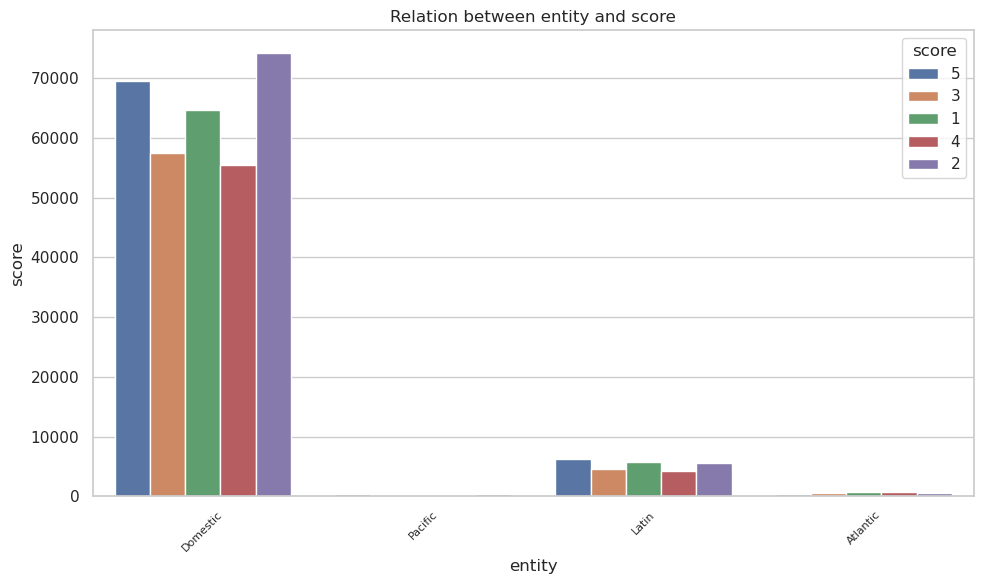

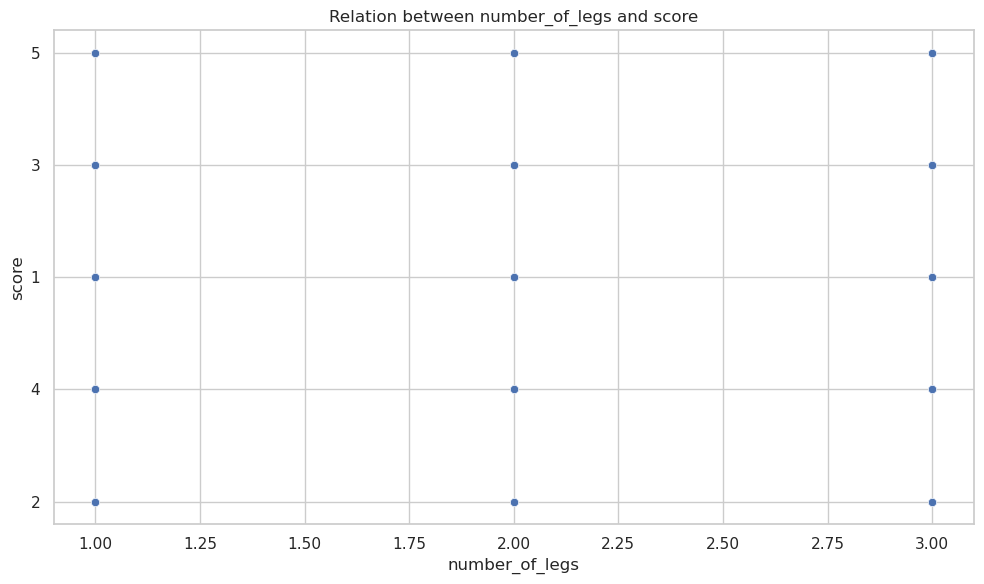

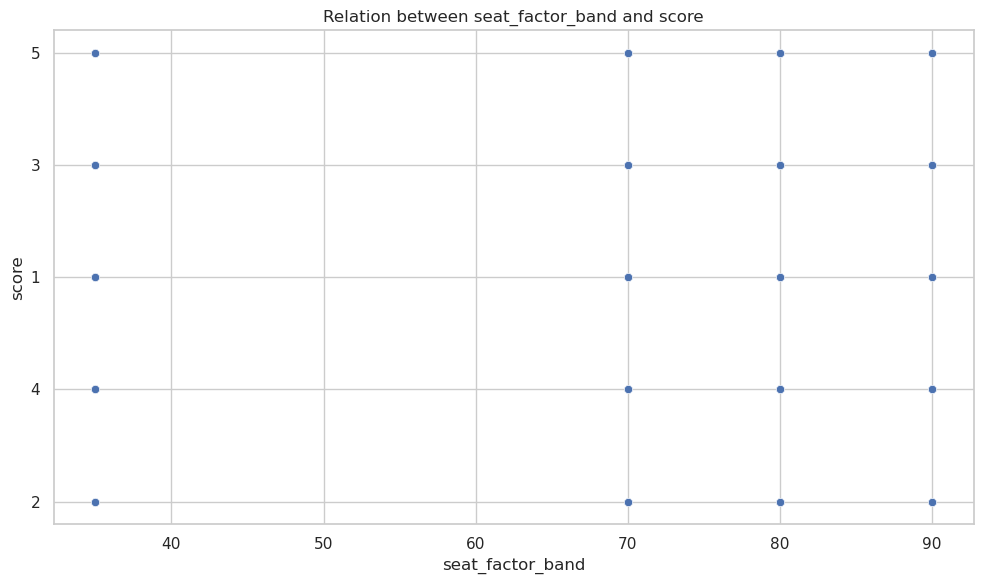

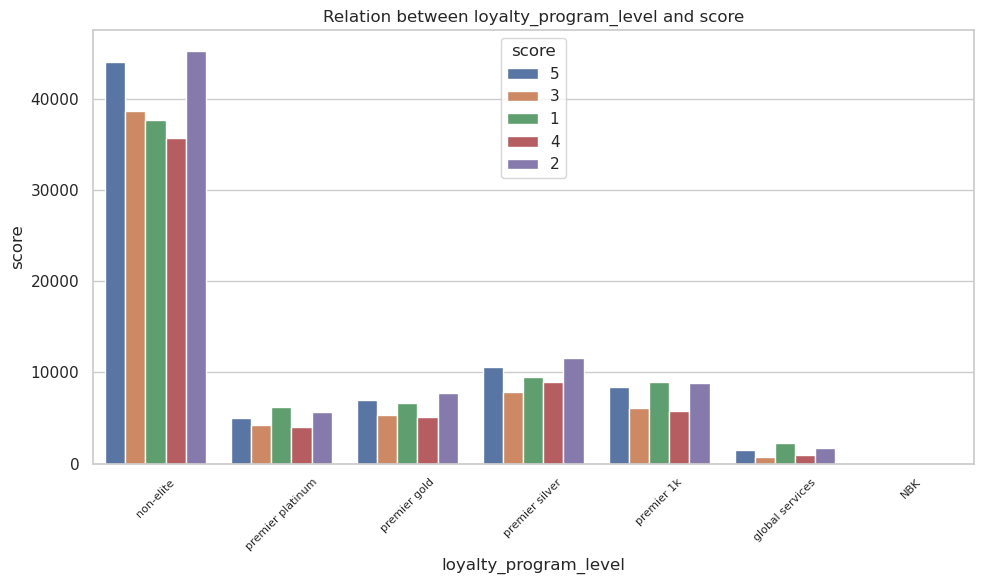

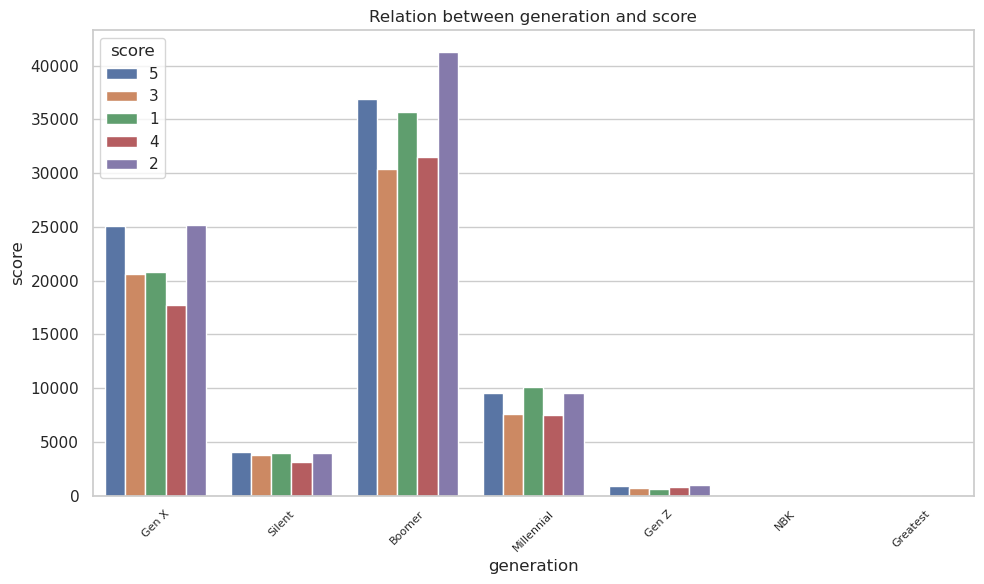

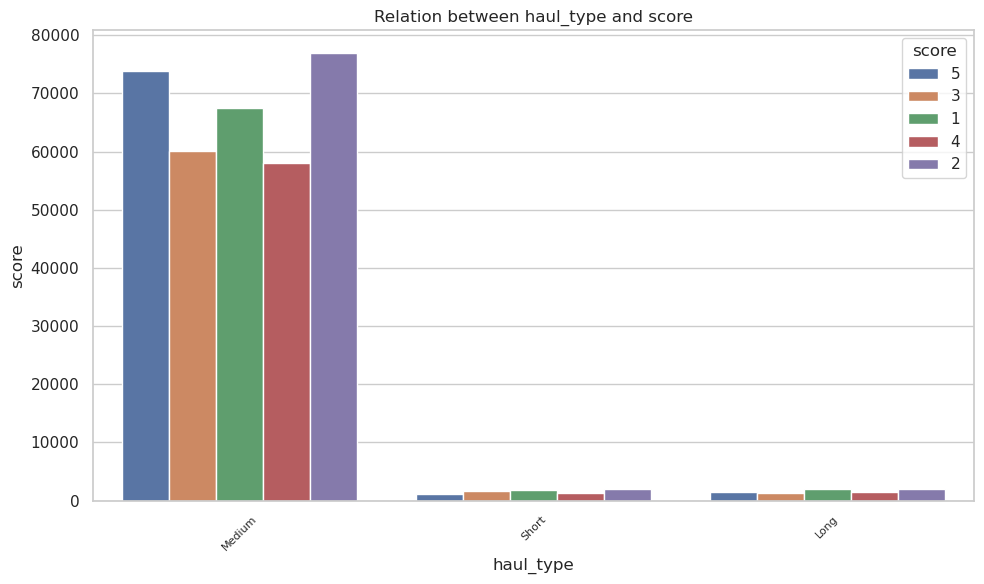

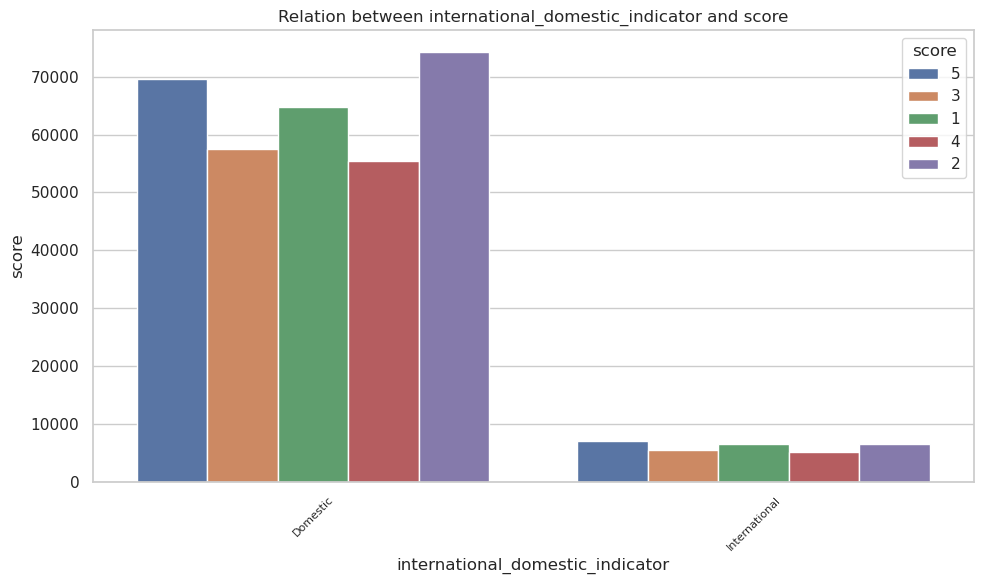

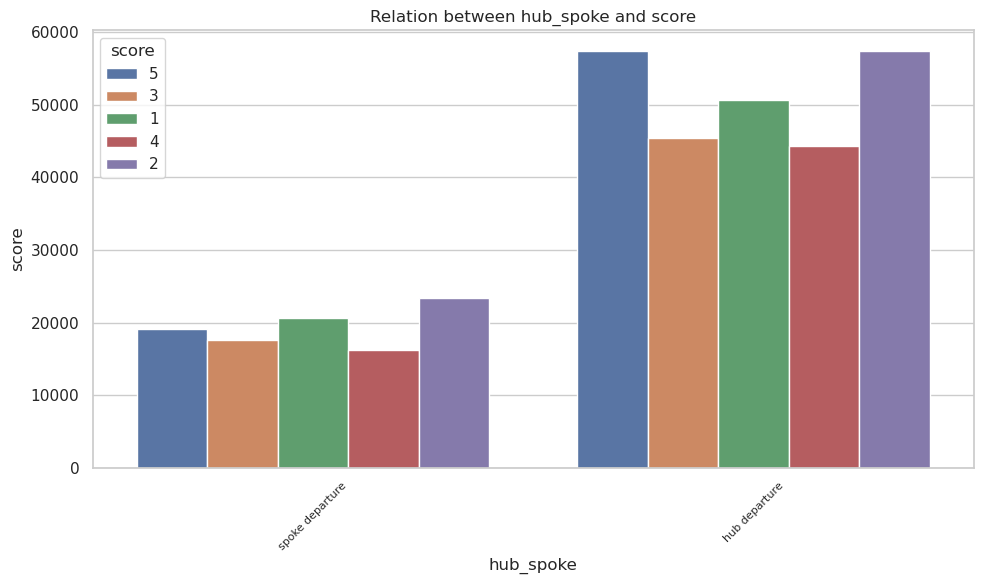

In [28]:
visualize_column_relations(Score1,'score','entree_description')

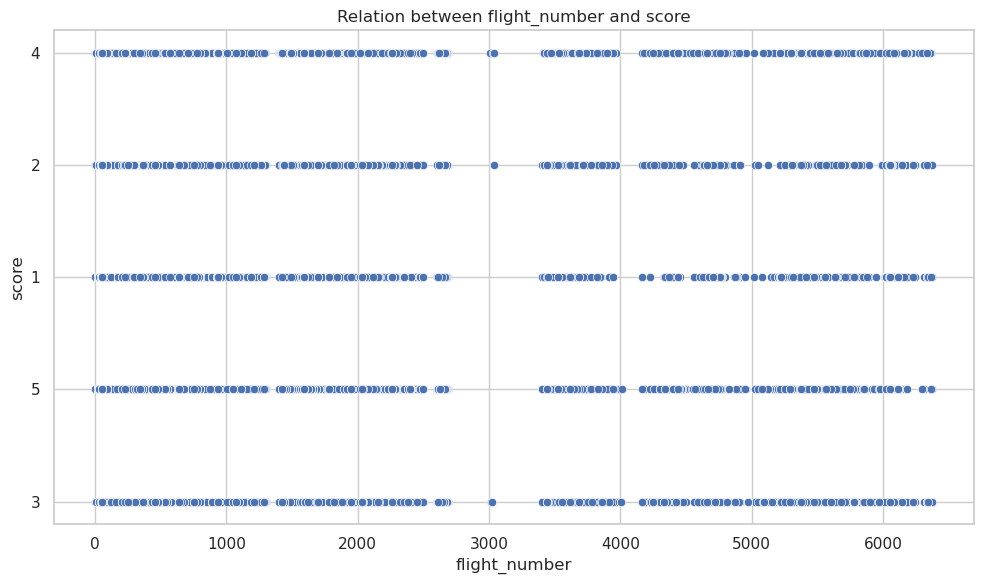

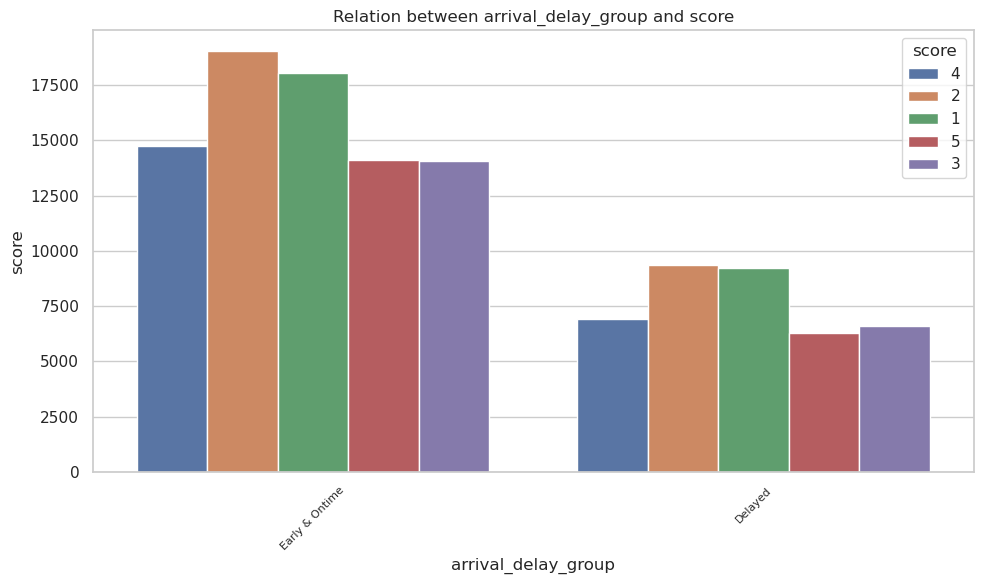

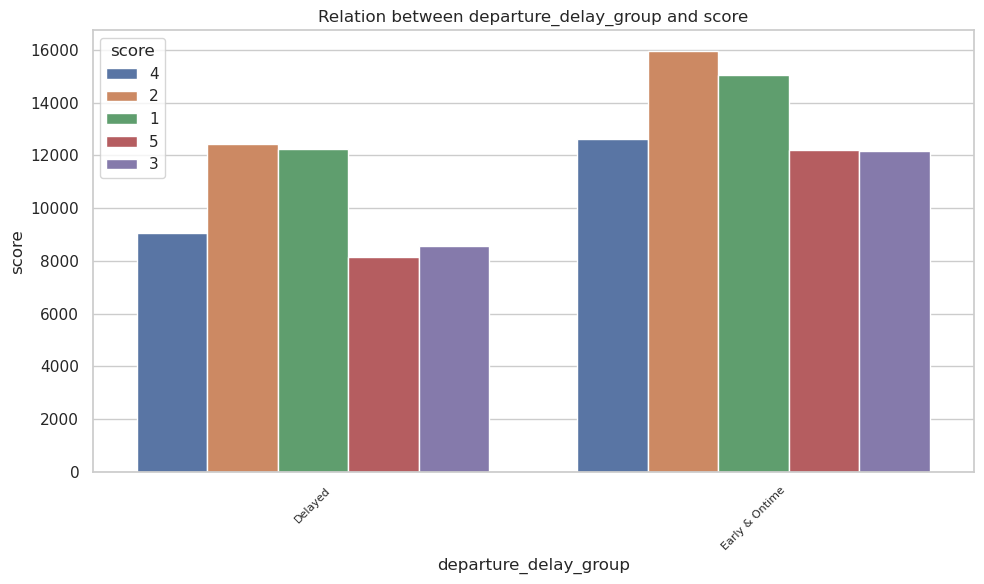

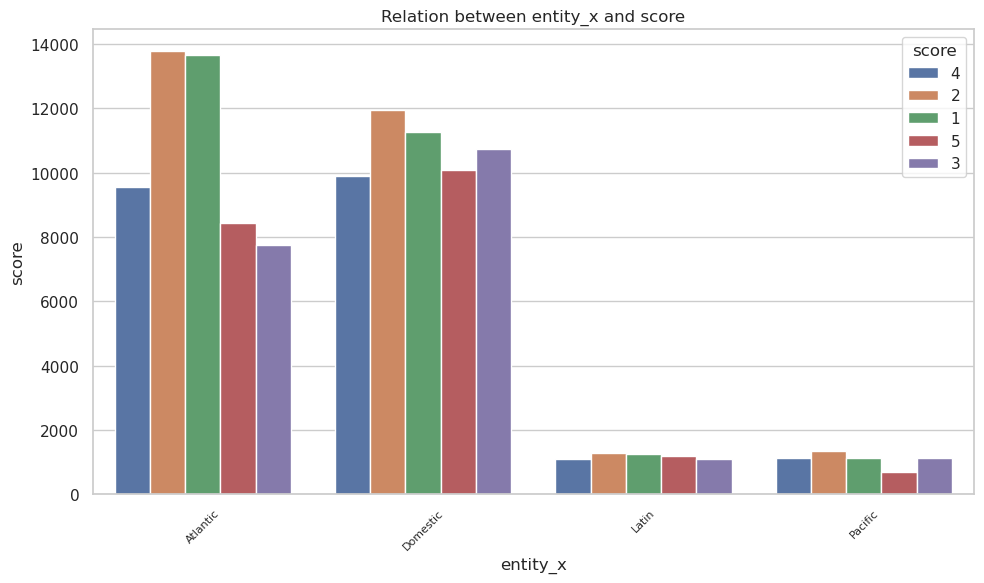

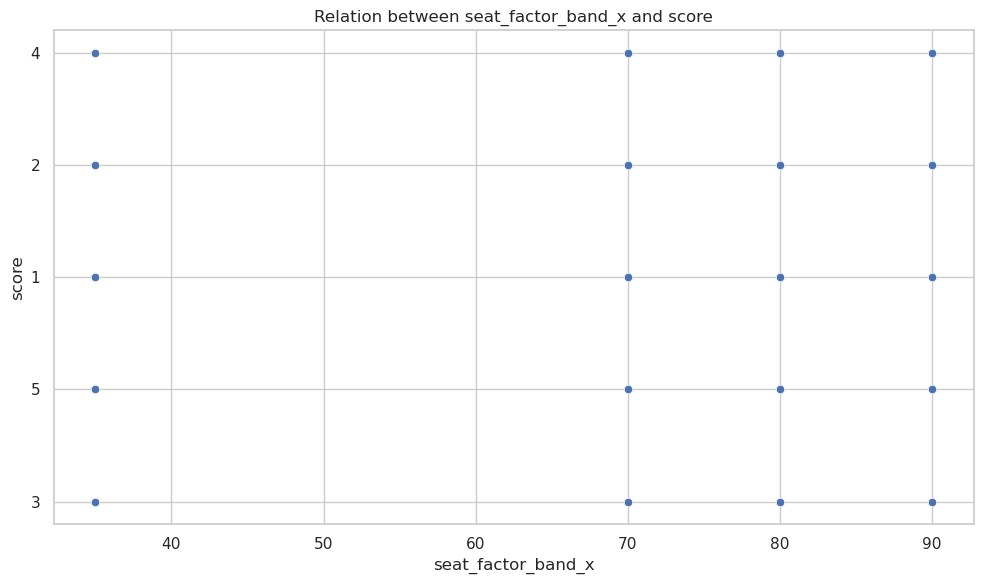

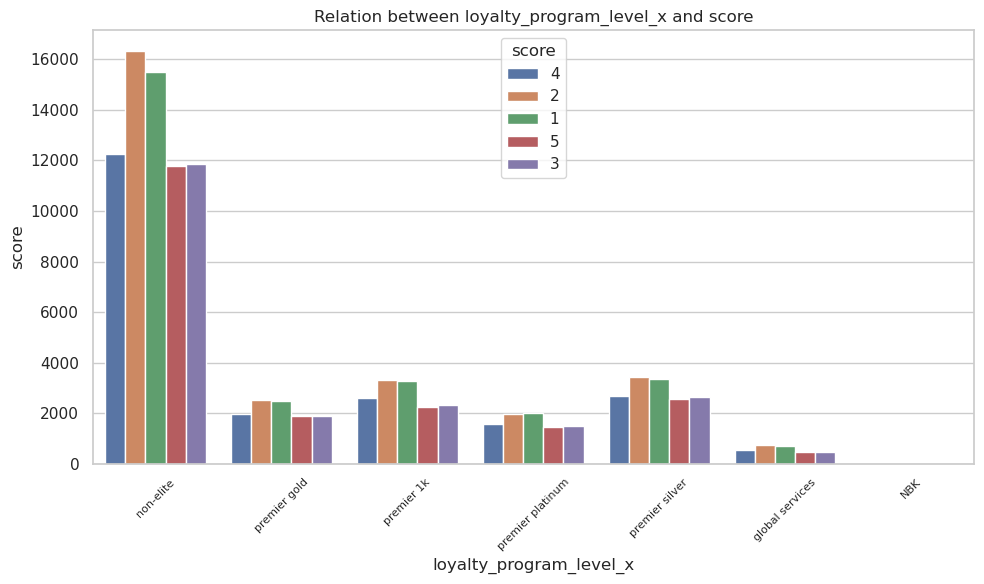

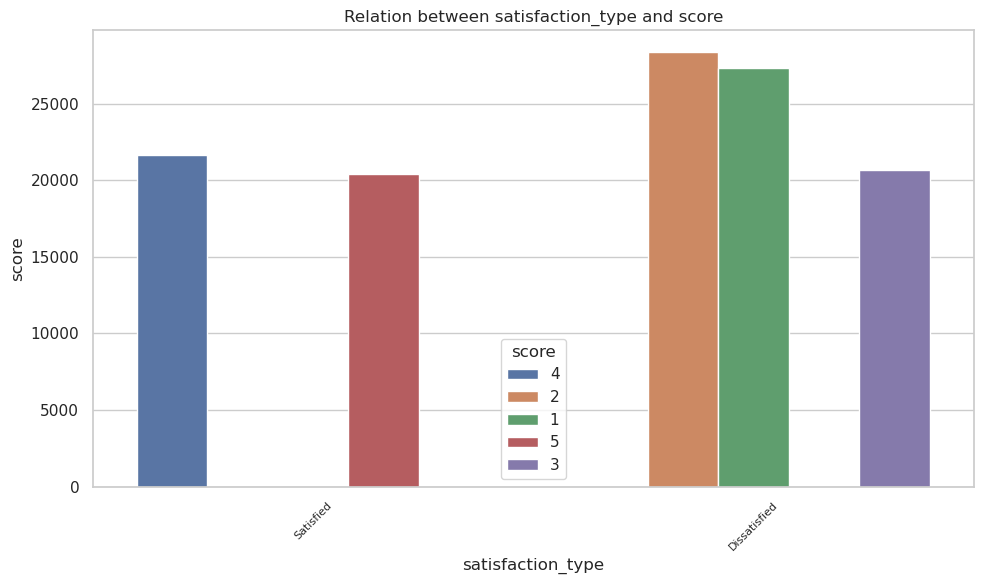

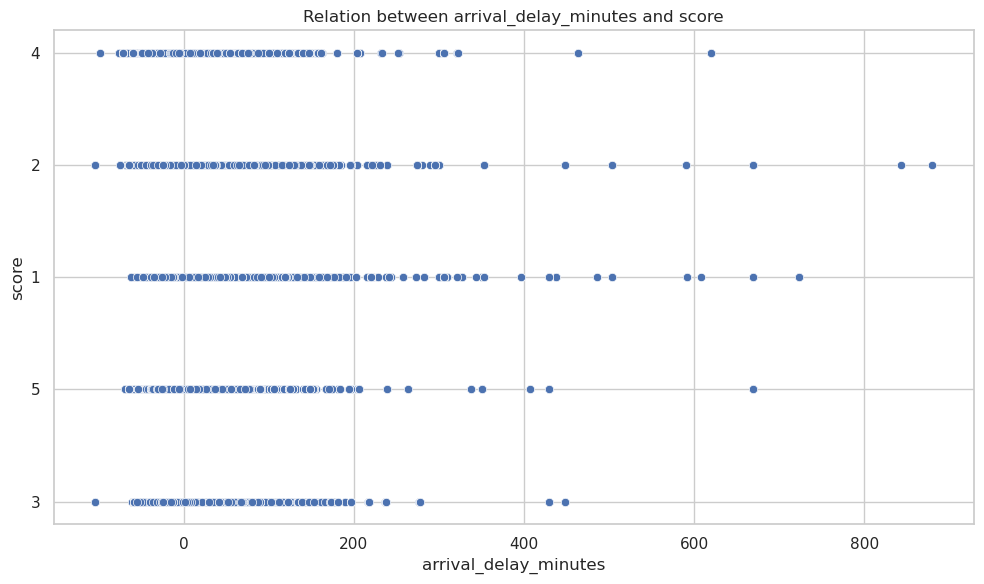

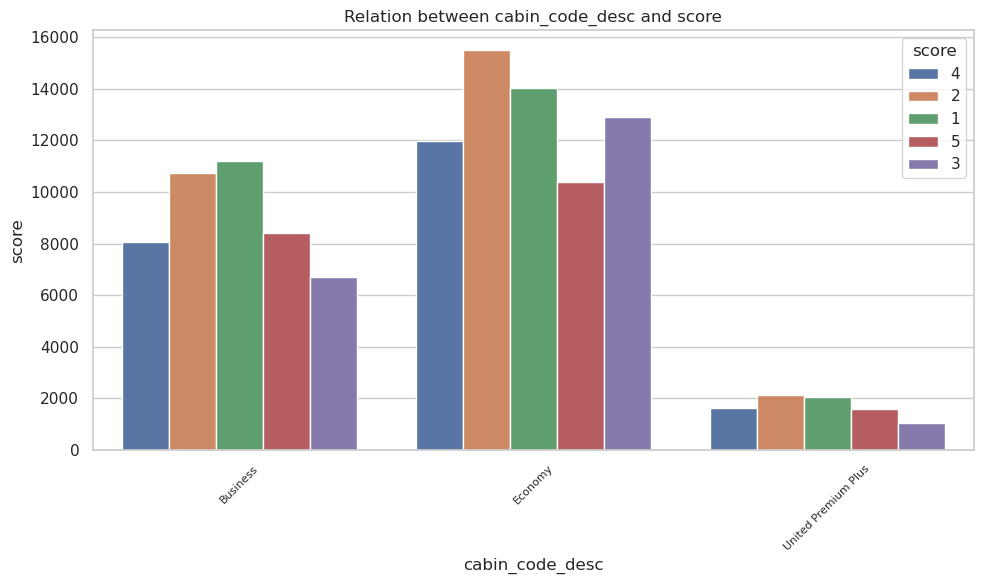

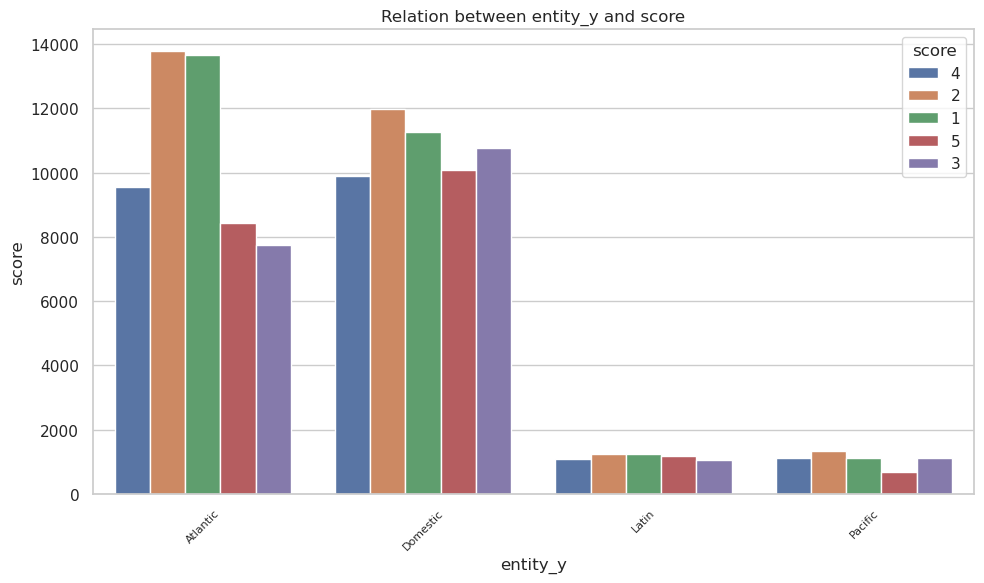

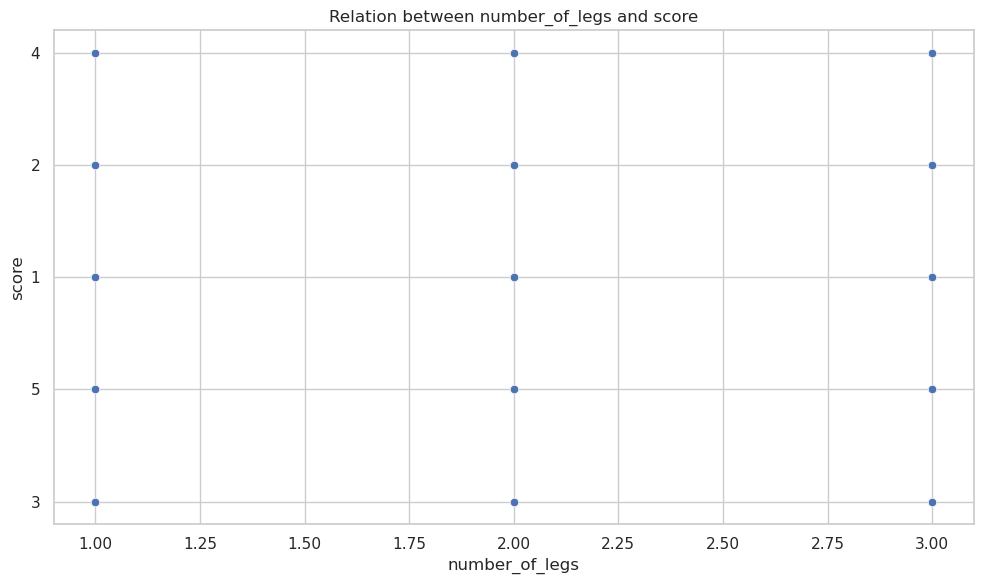

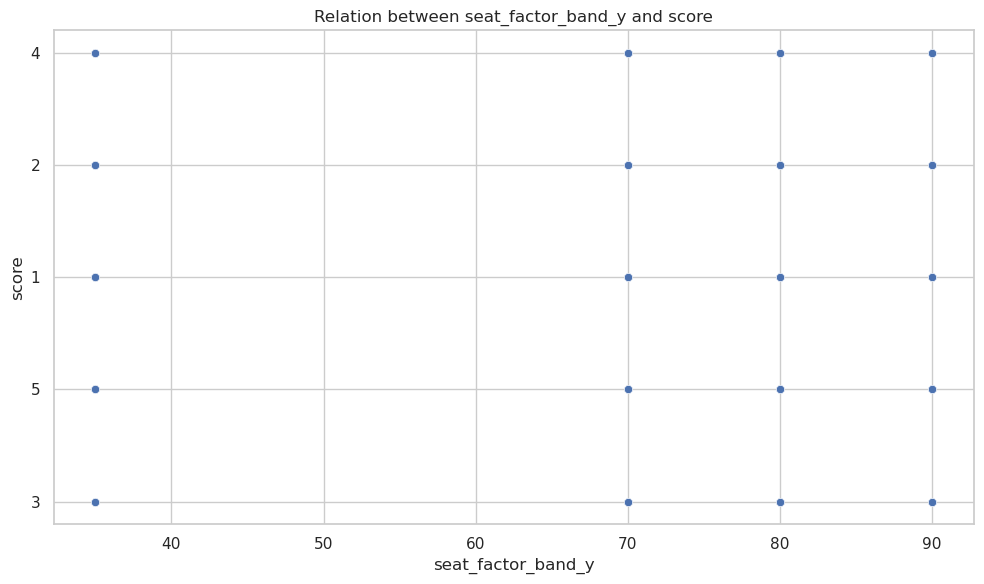

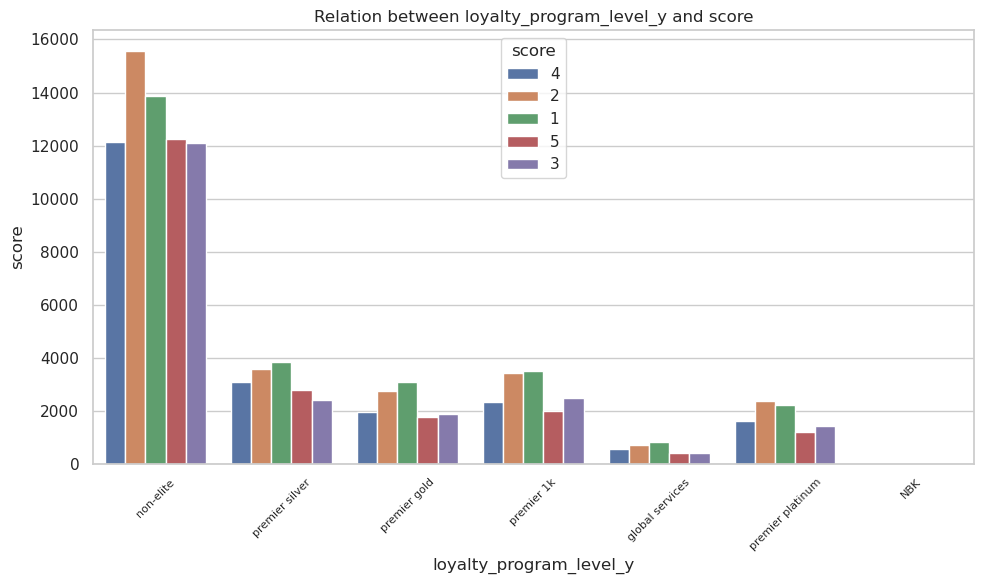

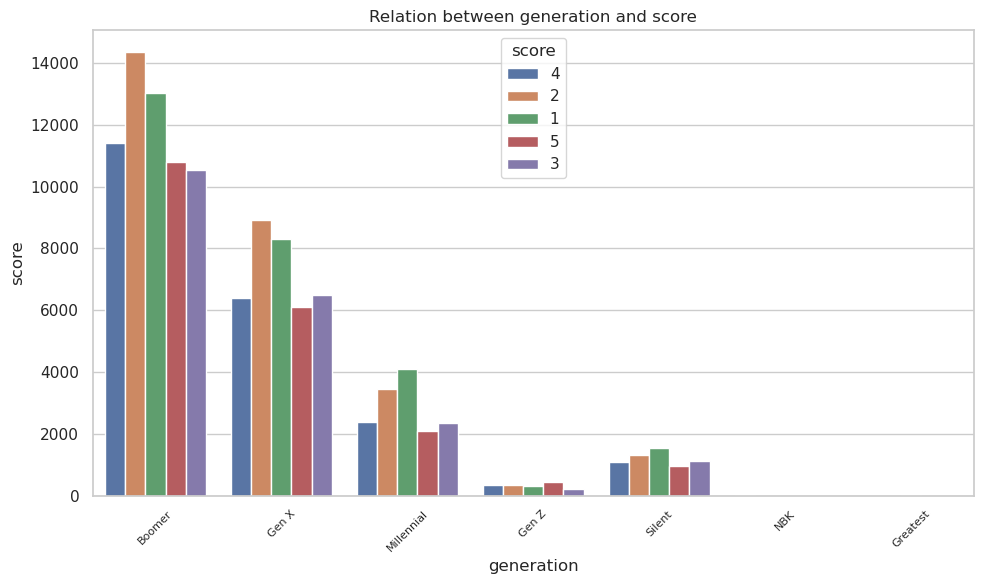

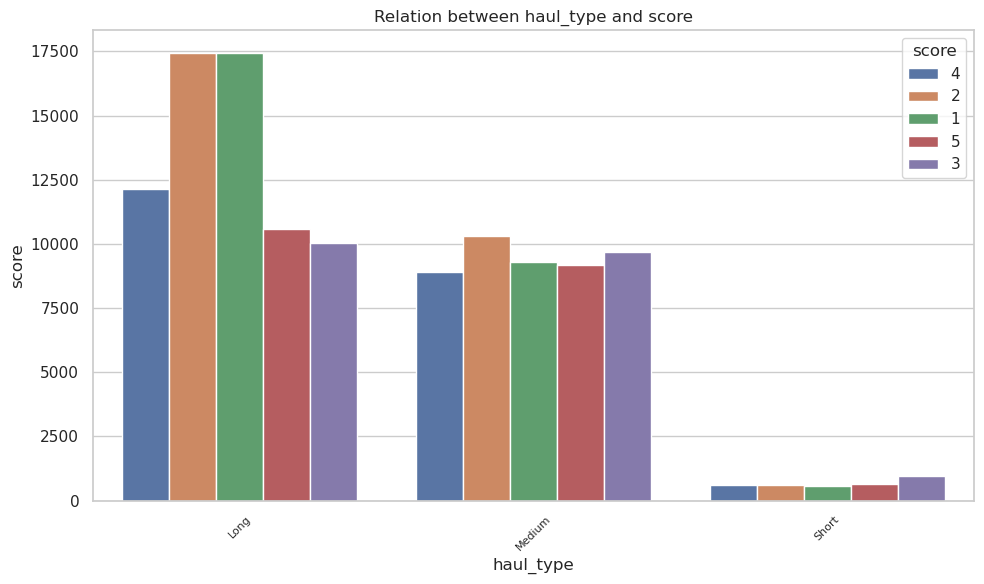

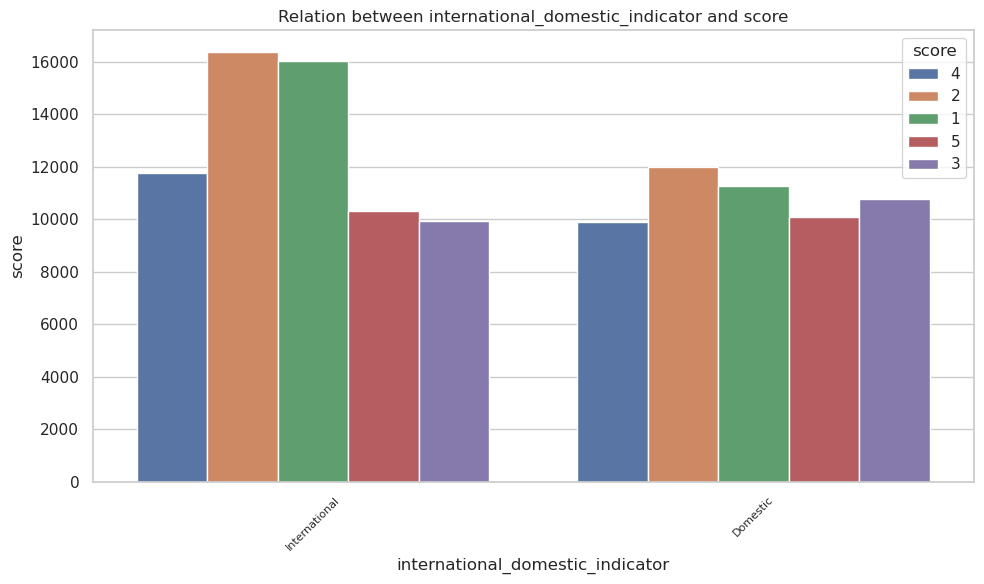

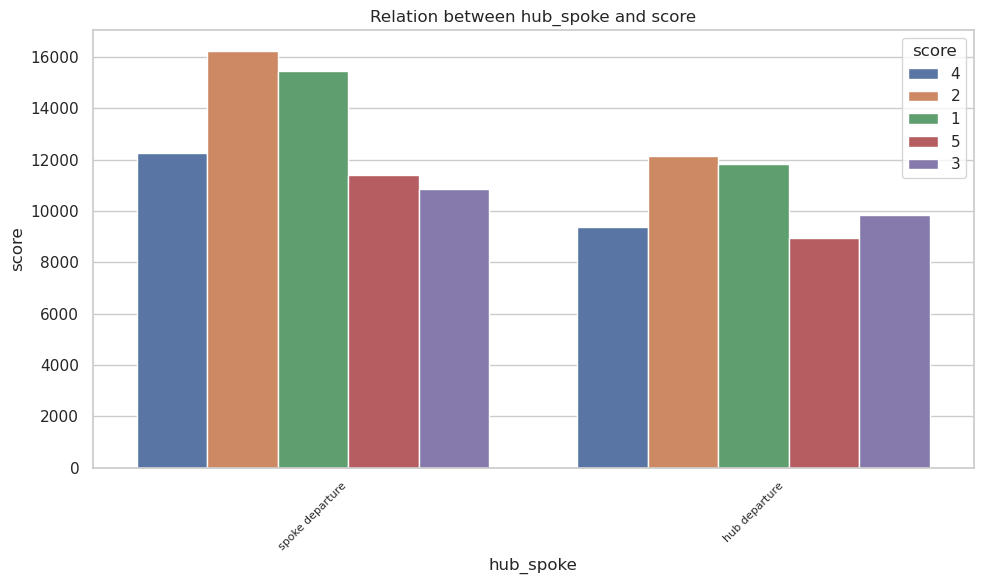

In [29]:
visualize_column_relations(Score3,'score','verbatim_text')

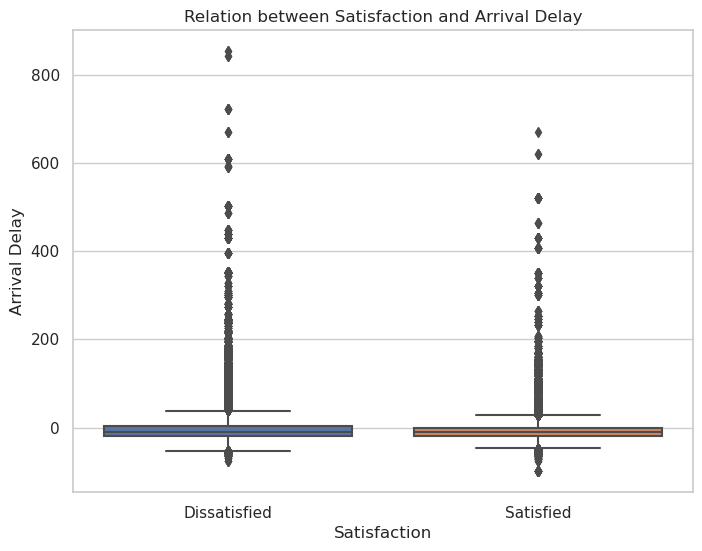

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction_type', y='arrival_delay_minutes', data=Score2)
plt.xlabel('Satisfaction')
plt.ylabel('Arrival Delay')
plt.title('Relation between Satisfaction and Arrival Delay')
plt.show()